# Content
* Import Data and Libraries
* Data Cleaning and Wrangling
* Elbow Technique
* K-Means

## 1 Importing Data and Libraries

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#data
df=pd.read_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\userapi_wrangledw_titles.csv'))

## 2 Data Cleaning and Wrangling

In [4]:
#viewing different aspects of the dataset
#this is a clean and wrangled data set
#but we can see if it needs any more wrangling for k-mean purposes
df.head(7)

,Unnamed: 0,Gender,Seeking,Age,Pictures,Profile Visits,Kisses,Fans,flirtInterests_chat,flirtInterests_friends,...,lang_en,lang_de,lang_it,lang_es,lang_pt,Verified,lastOnlineDate,lastOnlineTime,User ID,Under 25
0,0,F,M,25,4,8279,239,0,True,True,...,False,True,False,False,False,0,2015-04-25T20:43:26Z,1.429995e+09,55303fc3160ba0eb728b4575,0
1,1,F,M,22,5,663,13,0,True,True,...,False,True,True,False,False,0,2015-04-26T09:19:35Z,1.430040e+09,552e7b61c66da10d1e8b4c82,1
2,2,F,M,21,4,1369,88,0,False,False,...,False,False,False,False,False,0,2015-04-06T14:24:07Z,1.428330e+09,54a584ecc56da128638b4674,1
3,3,F,none,20,3,22187,1015,2,True,True,...,True,False,False,False,False,0,2015-04-07T11:21:01Z,1.428406e+09,54c92738076ea1b5338b4735,1
4,4,F,M,21,12,35262,1413,9,True,False,...,False,True,False,False,False,0,2015-04-06T14:25:20Z,1.428330e+09,54e1a6f6c76da135748b4a3a,1
5,5,F,M,24,18,7339,180,0,True,False,...,True,True,False,False,False,0,2015-04-08T14:37:51Z,1.428504e+09,54f2b4ce0b6ea1177e8b4d18,1
6,6,F,none,24,13,18672,492,0,False,True,...,True,True,False,False,False,0,2015-04-27T19:29:58Z,1.430163e+09,54ecbb39170ba08b488b4aa5,1


In [5]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Seeking', 'Age', 'Pictures', 'Profile Visits',
       'Kisses', 'Fans', 'flirtInterests_chat', 'flirtInterests_friends',
       'flirtInterests_date', 'Country', 'City', 'Location', 'distance',
       'isFlirtstar', 'isHighlighted', 'isInfluencer', 'isMobile', 'isNew',
       'isOnline', 'isVip', 'lang_count', 'lang_fr', 'lang_en', 'lang_de',
       'lang_it', 'lang_es', 'lang_pt', 'Verified', 'lastOnlineDate',
       'lastOnlineTime', 'User ID', 'Under 25'],
      dtype='object')

In [8]:
df.drop(columns='Unnamed: 0')

,Gender,Seeking,Age,Pictures,Profile Visits,Kisses,Fans,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,...,lang_en,lang_de,lang_it,lang_es,lang_pt,Verified,lastOnlineDate,lastOnlineTime,User ID,Under 25
0,F,M,25,4,8279,239,0,True,True,True,...,False,True,False,False,False,0,2015-04-25T20:43:26Z,1.429995e+09,55303fc3160ba0eb728b4575,0
1,F,M,22,5,663,13,0,True,True,True,...,False,True,True,False,False,0,2015-04-26T09:19:35Z,1.430040e+09,552e7b61c66da10d1e8b4c82,1
2,F,M,21,4,1369,88,0,False,False,True,...,False,False,False,False,False,0,2015-04-06T14:24:07Z,1.428330e+09,54a584ecc56da128638b4674,1
3,F,none,20,3,22187,1015,2,True,True,False,...,True,False,False,False,False,0,2015-04-07T11:21:01Z,1.428406e+09,54c92738076ea1b5338b4735,1
4,F,M,21,12,35262,1413,9,True,False,False,...,False,True,False,False,False,0,2015-04-06T14:25:20Z,1.428330e+09,54e1a6f6c76da135748b4a3a,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,F,M,20,2,105,2,0,False,True,False,...,False,False,False,True,False,0,2015-05-03T07:30:09Z,1.430638e+09,5544e4c3140ba0af1d8b47e1,1
3568,F,M,23,8,195,6,0,False,True,False,...,False,True,False,False,False,0,2015-05-03T08:59:57Z,1.430644e+09,5544fa0d0a6ea130328b4af0,1
3569,F,M,25,1,31,0,0,False,True,True,...,False,False,False,False,False,0,2015-05-03T08:57:34Z,1.430643e+09,55456631553fcb84024e8d7d,0
3570,F,M,19,1,3,0,0,True,True,False,...,False,False,False,False,False,0,2015-05-03T09:08:27Z,1.430644e+09,5545664a553fcb84024e8e05,1


In [18]:
#removing categorical columns
df2=df.drop(columns=['Unnamed: 0','Gender', 'Seeking','flirtInterests_chat', 'flirtInterests_friends',
       'flirtInterests_date', 'Country', 'City', 'Location', 'distance',
       'isFlirtstar', 'isHighlighted', 'isInfluencer', 'isMobile', 'isNew',
       'isOnline', 'isVip', 'lang_fr', 'lang_en', 'lang_de',
       'lang_it', 'lang_es', 'lang_pt', 'Verified', 'lastOnlineDate',
       'lastOnlineTime', 'User ID'])

In [19]:
#attempting standardization
df2['Profile Visits'] = (df2['Profile Visits'] - df2['Profile Visits'].mean()) / df2['Profile Visits'].std() 

In [20]:
#standardization on Kisses
df2['Kisses'] = (df2['Kisses'] - df2['Kisses'].mean()) / df2['Kisses'].std() 

## 3 Elbow Technique

In [23]:
#establishing range and defining kmeans
numcl=range(1,10)
kmeans=[KMeans(n_clusters=i)for i in numcl]

In [24]:
#identify and view score
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]
score

C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-685027.6581746917,
 -288085.7586762889,
 -176945.83278220976,
 -133594.13331458266,
 -98396.90971948927,
 -81620.48163618424,
 -69076.36374540452,
 -59599.44142099179,
 -52763.68389448047]

Text(0.5, 1.0, 'The Elbow Technique')

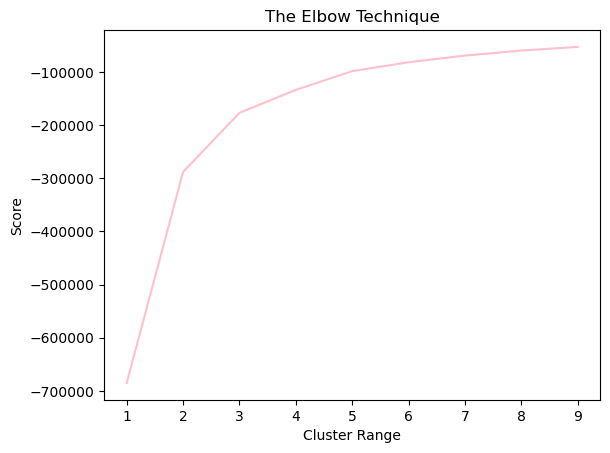

In [27]:
#plotting points
color='pink'
pl.plot(numcl,score,color=color)
pl.xlabel('Cluster Range')
pl.ylabel('Score')
pl.title('The Elbow Technique')


#### Based on the plot of the elbow technique, our cluster hits different points at 2,3 and 5. At point 5 is where it straightens out so we will make our maximal cluster count 4. I am choosing 4 as it is the sweet spot before 3 and 5, and after initially fitting the data I found that the 5th cluster range had no data points in it, so reducing the cluster range to 4 allows it to plot with an easier view

# 4 K-Means 

In [35]:
#creating kmeans 
kmeans=KMeans(n_clusters=4)

In [36]:
#fit to dataframes
kmeans.fit(df2)

C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [37]:
#adding clusters column to dataframe
df2['clusters']=kmeans.fit_predict(df2)

C:\Users\Samth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
#identifying cluster counts
df2['clusters'].value_counts()

clusters
0    3069
3     409
2      79
1      15
Name: count, dtype: int64

#### according to our cluster count, a majority of the records fit in cluster 1(0) or in cluster 4(3)

In [39]:
#viewing adjusted dataframe
df2.head(4)

,Age,Pictures,Profile Visits,Kisses,Fans,lang_count,Under 25,clusters
0,25,4,0.613918,0.183965,0,1,0,0
1,22,5,-0.461811,-0.391261,0,3,1,0
2,21,4,-0.362091,-0.200368,0,0,1,0
3,20,3,2.578366,2.159077,2,2,1,0


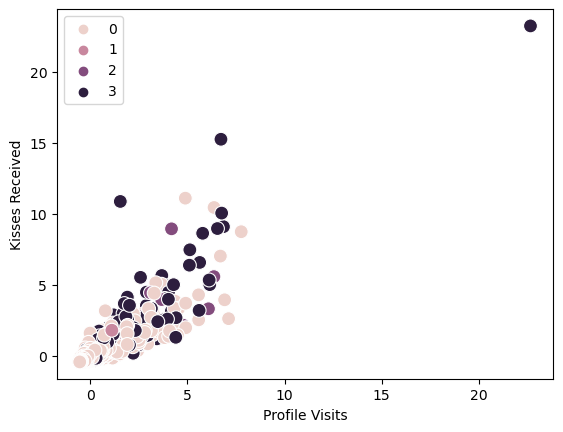

<Figure size 1500x700 with 0 Axes>

In [43]:
#plotting clusters

clusterpic = sns.scatterplot(x=df2['Profile Visits'], y=df2['Kisses'], hue=kmeans.labels_, s=100) 
clusterpic.grid(False)
plt.xlabel('Profile Visits')
plt.ylabel('Kisses Received')
plt.figure(figsize=(15,7))
plt.show()

In [42]:
#saving figure
clusterpic.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\kmean_profilekisses_cluster.png'))

### Our first cluster plot makes sense as we know that most women receive a similar ratio of profile visits and kisses, with some anomalies to the data of women who receive more visits and kisses than their counterparts

In [47]:
#standardizing for another variable to identify
df2['Pictures'] = (df2['Pictures'] - df2['Pictures'].mean()) / df2['Pictures'].std() 

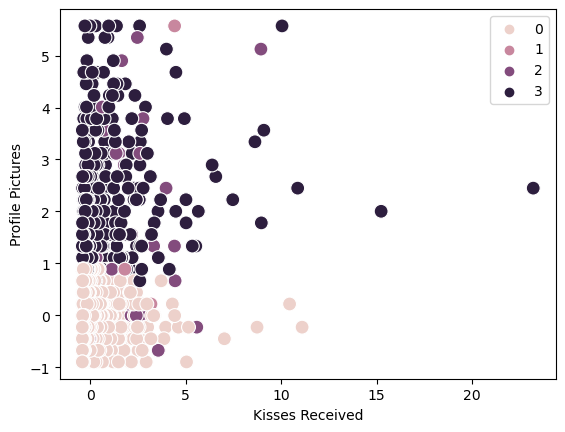

<Figure size 1500x700 with 0 Axes>

In [50]:
#plotting another cluster variable
clusterplot = sns.scatterplot(x=df2['Kisses'], y=df2['Pictures'], hue=kmeans.labels_, s=100) 
clusterpic.grid(False)
plt.xlabel('Kisses Received')
plt.ylabel('Profile Pictures') 
plt.figure(figsize=(15,7))
plt.show()

In [51]:
#saving figure
clusterplot.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\pic_kiss_kmeancluster.png'))

### The figure is not shaped well, but many profiles fit in the 3rd cluster. We did expect this figure to be scattered all over, however it does confirmed that on average a woman will have 2 profile pictures or more on their account, however more profile pictures doesn't guarantee more likes.

In [54]:
#descriptive statistics
desc=df2.groupby('clusters').agg({'Profile Visits':['mean', 'median'], 
                         'Kisses':['mean', 'median'], 
                         'Pictures':['mean', 'median']})

In [55]:
#viewing descriptive dataframe
desc.head()

Profile Visits              Kisses            Pictures          
                   mean    median      mean    median      mean    median
clusters                                                                 
0             -0.139931 -0.396273 -0.127315 -0.322540 -0.298921 -0.451195
1              0.535046 -0.083272  0.585944 -0.136736  0.218010 -0.005058
2              0.900998  0.545838  0.783548  0.005797  0.681089 -0.005058
3              0.856339  0.299787  0.782496  0.099971  2.103456  1.779489

In [56]:
#saving descriptive stat data
desc.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\clusters_descriptive_stats.csv'))